# One Way ANOVA - Cholesterol

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df = pd.read_csv('Cholesterol.csv')

In [5]:
df

,Before,After4weeks,After8weeks,Margarine
0,6.76,6.20,6.13,A
1,4.80,4.27,4.15,A
2,7.49,7.12,7.05,A
3,5.05,4.63,4.67,A
4,3.91,3.70,3.66,A
5,6.17,5.56,5.51,A
6,7.67,7.11,6.96,A
7,7.34,6.84,6.82,A
8,5.13,4.52,4.45,A
9,6.42,5.83,5.75,B


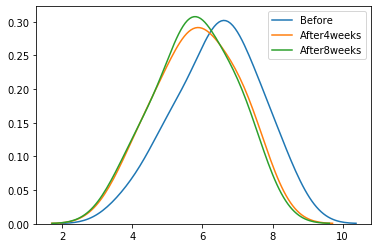

In [6]:
sns.kdeplot(df.Before)
sns.kdeplot(df.After4weeks)
sns.kdeplot(df.After8weeks)

In [7]:
df['loss4'] = df.After4weeks - df.Before
df['loss8'] = df.After8weeks - df.Before

In [8]:
df

,Before,After4weeks,After8weeks,Margarine,loss4,loss8
0,6.76,6.20,6.13,A,-0.56,-0.63
1,4.80,4.27,4.15,A,-0.53,-0.65
2,7.49,7.12,7.05,A,-0.37,-0.44
3,5.05,4.63,4.67,A,-0.42,-0.38
4,3.91,3.70,3.66,A,-0.21,-0.25
5,6.17,5.56,5.51,A,-0.61,-0.66
6,7.67,7.11,6.96,A,-0.56,-0.71
7,7.34,6.84,6.82,A,-0.50,-0.52
8,5.13,4.52,4.45,A,-0.61,-0.68
9,6.42,5.83,5.75,B,-0.59,-0.67


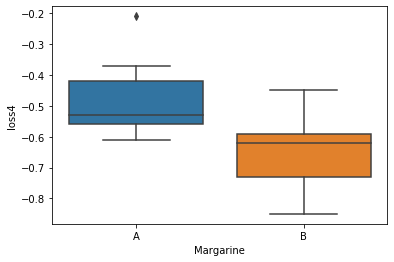

In [9]:
sns.boxplot(df.Margarine, df.loss4)

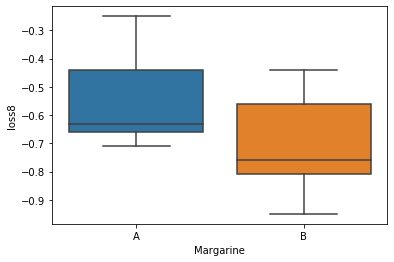

In [10]:
sns.boxplot(df.Margarine, df.loss8)

In [11]:
stats.ttest_ind(a = df.loss4[df.Margarine=='A'],
                b = df.loss4[df.Margarine=='B'], equal_var=True)

Ttest_indResult(statistic=2.5185987910477103, pvalue=0.022803946887595898)

In [12]:
# ANOVA

In [13]:
formula = 'loss4 ~ C(Margarine)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df    sum_sq   mean_sq        F    PR(>F)
C(Margarine)   1.0  0.116806  0.116806  6.34334  0.022804
Residual      16.0  0.294622  0.018414      NaN       NaN


In [16]:
# Reject the null hypothesis - there is difference in drop in cholestrol between A and B brands!

In [17]:
formula = 'loss8 ~ C(Margarine)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df    sum_sq   mean_sq         F    PR(>F)
C(Margarine)   1.0  0.121689  0.121689  4.634786  0.046933
Residual      16.0  0.420089  0.026256       NaN       NaN


In [18]:
# Reject the null hypothesis - there is difference in drop in cholestrol between A and B brands also after 8 weeks!

In [19]:
# The end!